# Lab 6: Univariate Linear Regression

## Initialize

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Task 1 - Initialization
In the first task of the lab, we will model linear regression based on a data set that contains grades from CS 205 course in fall 2018. The dataset (with no ID's) contain midterm and final exam grades of Rutgers students (including other assignment grades). 

### Activity 1.1  Read Data
Read the file into a dataframe and keep only the midtermRaw and FinaRaw columns. We will be doing univariate regression on x=midterm, y=finalExam
The goal is to find a model that will allow us to predict the final exam score given the midterm score.

In [2]:
import pandas as pd
df = pd.read_csv("data/CS205_grades_12_19_18_Final.csv")
df_cleaned = df[['midtermRaw','finalRaw']]
# drop all undefined rows 
df_cleaned = df_cleaned.dropna() 
df_cleaned.head()

,midtermRaw,finalRaw
3,45.5,62.0
4,58.0,60.5
5,68.0,32.0
6,64.5,50.5
7,74.0,51.0


### Activity 1.2 Normalize Data
In this task, you need to normalize data using MinMaxScaler from sklearn.preprocessing. Normalize midterm and final scores to be between 0 and 1. X_scaled_values and Y_scaled_values are the normalized midterm and final exam scores.

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2=scaler.fit_transform(df_cleaned)
X_scaled_values=df2[:,0]
Y_scaled_values=df2[:,1]

# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

### Activity 1.3 Plot the data to see if a linear regression line is a good fit

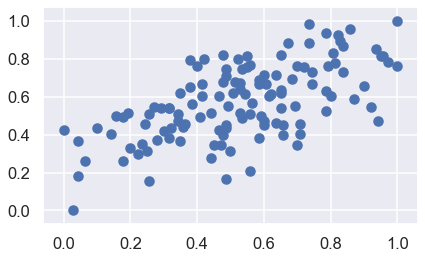

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x,y)

## Question 1.4
### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression? Why?
- Yes, as we can see there is a linear relationship between x and y variables, on each x value we can find its y value. If we look at the most dense of the dots, it looks like a positive slop line go through it.

### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error (or any other error such as L1 or Huber)
$$
E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [5]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1 * x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [6]:
import numpy as np
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    sum0=0
    n = len(x)
    for i in range(n):
        sum0 += (theta1 * x[i] +theta0 - y[i])**2
    return sum0/n

## testing
sqerror(x, y, 0.29,0.52)


0.02348942348323907

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [7]:
import numpy as np
import math
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    return np.mean(np.absolute(h(theta0, theta1, x)-y))
## testing
abserror(x, y, 0.29,0.52)

0.1258878083450344

### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
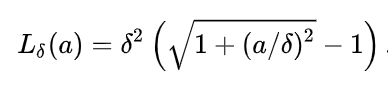
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [8]:
import numpy as np
import math

def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """

    return np.mean(delta**2 *(np.sqrt(1 + ((np.abs(h(theta0, theta1, x)-y))/delta)**2) -1))

## testing
huberror(x, y, 0.29,0.52,0.1)

0.006994227909507368

### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget (as in Lab5) to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [9]:
from ipywidgets import interact

!jupyter nbextension enable --py widgetsnbextension

In [10]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x) 
    # compose plot
    pylab.plot(x,y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x, y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x, y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x, y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    pylab.scatter(x, y, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [12]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.2
theta1 =0.7
error = 0.1288
# BEST VALUES FOR AVE ABS ERROR
theta0 =0.2
theta1 =0.7
error = 0.025128

# BEST VALUES FOR AVE HUBER ERROR
theta0 =0.2
theta1 =0.7
error = 0.0012

# Task 3 - Gradient Descent
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x_j + \theta_0)-y_j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x_j + \theta_0 - y_j)*x_j
$$

The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute using Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [11]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.
 
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0
    theta1 = 1
    oldError = 10
    n = len(obsX)
    count = 0
    while(True):
        sum0 = 0
        sum1 = 0

        for i in range(n):
            sum0 += obsX[i] * theta1 + theta0 - obsY[i]
            sum1 += (obsX[i] * theta1 + theta0 -obsY[i]) * obsX[i]               
        theta0 = theta0 - alpha * sum0
        theta1 = theta1 - alpha * sum1
        newError = sqerror(obsX, obsY, theta1,theta0)        
        tolerance = abs(newError - oldError)
        if(tolerance <= threshold):
            break;
        oldError = newError
        count += 1
        print(theta0, theta1, newError, count)
    return theta0, theta1, newError, count

[theta0,theta1,newError,iterations] = gd2(x,y,0.01,0.000001)
print(iterations)


0.05437313432835818 0.9967095948827293 0.23980749256935113 1
0.044009367164179046 0.9593776206883948 0.20347169181668837 2
0.07069614881245201 0.9441697657455459 0.20122272144465997 3
0.07445850260114387 0.917853040028166 0.18177344667160272 4
0.09072534967175905 0.8999270692939488 0.17392301537443877 5
0.09865378179349293 0.8787952165048333 0.16115338989852493 6
0.11058707857120836 0.8612063155101113 0.1526715530874735 7
0.11929279485989783 0.8430938322678296 0.14311161078149046 8
0.12908170670422459 0.8267745889439873 0.13539448072459512 9
0.13745408438385084 0.8108047769006026 0.12774739816494188 10
0.1459247851577802 0.7959626266385375 0.12107597240750992 11
0.15363876380038088 0.7817196378809479 0.11477267452868725 12
0.16113673439377352 0.7683216378319104 0.10909976282203313 13
0.1681342991892166 0.7555611908467732 0.10383224658782939 14
0.17483191027358902 0.7435014484390304 0.0990299024322874 15
0.1811423520316239 0.7320490552541277 0.09459663726863012 16
0.1871464583906476 0.7

In [12]:
# observe theta0 and theta1

theta0, theta1

(0.29614372377387144, 0.5239836435320433)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [13]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta0 = 1
    theta1 = 1
    oldError = 10
    n = len(obsX)
    count = 0
    while(True):
        sum0 = 0
        sum1 = 0

        for i in range(n):
            sum0 += obsX[i] * theta1 + theta0 - obsY[i]
            sum1 += (obsX[i] * theta1 + theta0 -obsY[i]) * obsX[i]               
        theta0 = theta0 - alpha * sum0
        theta1 = theta1 - alpha * sum1
        newError = huberror(obsX, obsY, theta1, theta0, delta)
        
        if(abs(newError - oldError) <= threshold):
            break;
        oldError = newError
        count += 1
        print(theta0, theta1, oldError, count)
    return theta0, theta1, oldError, count
 
# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(iterations)

-0.17562686567164243 0.345709594882729 0.003259348936712096 1
0.5207103671641793 0.7262591706883951 0.0041851670419280574 2
0.11281502976245161 0.49674211943233154 0.001393523283773101 3
0.3560465577325465 0.6273046456446744 0.0023696139056498173 4
0.2151071017351895 0.5457438100121484 0.0014457237852816493 5
0.30061928061135595 0.5895300510083368 0.0018706638197379755 6
0.25244663658131905 0.5596119981309464 0.0015534510969993178 7
0.2830029971314087 0.5733777961976849 0.0017104260885184804 8
0.26701349966344134 0.5615811729954964 0.0015956171765556318 9
0.27837068578569857 0.5650528260035304 0.001645769602706534 10
0.2734984868693493 0.5597009521744442 0.0016009584533003287 11
0.2781031624828447 0.5597253548977722 0.0016130188052445634 12
0.2770282009188542 0.5567420621406707 0.0015927176335792167 13
13


### Activity 3.2 Analysis
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
1. - intital theta0 : 0
   - intital theta1: 1
   - theta0 : 0.2933359129781111
   - theta1: 0.5290639683008116
   - alpha: 0.01
   - error: 0.0014825998280743565
   - iterations: 85
2. - New experiment:
   - intital theta0 : 1
   - intital theta1: 1
   - theta0 : 0.2770282009188542
   - theta1: 0.5567420621406707
   - alpha: 0.01
   - error: 0.0015927176335792167 
   - iterations:13. 
  - With these new values of theta0, theta1, the final error is similar but with lesser of iterations.

##### END ANSWER

### Activity 3.3 Compare with Library Estimators

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

[0.29620134]
[[0.5238794]]


In [15]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x, y, theta0,theta1)

array([[0.02342046]])

## Task 4- Predict the Final Exam Score
The regression line was obtained using grades from CS 205 course. We can consider them to be training data. Now we trained a model (with theta0 and theta1) so we can predict the grade for your own course based on your midterm grade.
We will do few things before we can accomplish this task.

### Activity 4.1 Read the midterm grades
The grade file for CS439 midterm is given in data/CS439_grades.csv. Read this data file to a new 

In [16]:
import pandas as pd
df_439 = pd.read_csv("data/CS439_grades_03_15_19.csv")
df_439.info()
mid = df_439[df_439['midterm']<80]
mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
midterm    97 non-null float64
dtypes: float64(1)
memory usage: 856.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 96
Data columns (total 1 columns):
midterm    96 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


### Activity 4.2 Predict your Grade
Scale the values in the midterm grades of CS 439 and compute the estimated final exam grade. Note that this is probably not a very good estimator since we are trying to predict final exam just by using a midterm score. However, using more features such as labs and quiz scores can help improve the accuracy. We will do that in a future lab. The output is shown as values scaled back to percentages (100% max)

In [17]:
from sklearn import preprocessing

scaler=MinMaxScaler()
m = scaler.fit_transform(mid)
f_pred = (result.predict(m))*100
final_pred = np.around(f_pred, 1)
print('midterm, final_pred')
print(np.c_[mid,final_pred] )
    


midterm, final_pred
[[58.5  61.9 ]
 [51.   51.8 ]
 [55.   57.2 ]
 [39.5  36.3 ]
 [71.5  79.3 ]
 [56.5  59.2 ]
 [50.   50.4 ]
 [52.5  53.8 ]
 [51.5  52.5 ]
 [43.   41.  ]
 [53.5  55.1 ]
 [51.5  52.5 ]
 [64.   69.2 ]
 [60.   63.9 ]
 [55.   57.2 ]
 [51.5  52.5 ]
 [58.5  61.9 ]
 [51.   51.8 ]
 [58.   61.2 ]
 [73.5  82.  ]
 [62.   66.6 ]
 [58.5  61.9 ]
 [34.5  29.6 ]
 [55.5  57.8 ]
 [48.   47.8 ]
 [67.   73.3 ]
 [61.   65.2 ]
 [70.   77.3 ]
 [46.   45.1 ]
 [63.   67.9 ]
 [61.   65.2 ]
 [35.5  31.  ]
 [58.5  61.9 ]
 [61.5  65.9 ]
 [53.5  55.1 ]
 [73.   81.3 ]
 [48.   47.8 ]
 [58.   61.2 ]
 [52.   53.1 ]
 [54.   55.8 ]
 [61.5  65.9 ]
 [58.   61.2 ]
 [67.   73.3 ]
 [45.   43.7 ]
 [58.5  61.9 ]
 [42.5  40.4 ]
 [42.   39.7 ]
 [37.   33.  ]
 [66.   71.9 ]
 [52.   53.1 ]
 [45.   43.7 ]
 [40.   37.  ]
 [61.   65.2 ]
 [54.5  56.5 ]
 [44.   42.4 ]
 [65.   70.6 ]
 [43.5  41.7 ]
 [58.   61.2 ]
 [62.5  67.2 ]
 [68.   74.6 ]
 [54.   55.8 ]
 [49.   49.1 ]
 [63.   67.9 ]
 [59.   62.5 ]
 [57.5  60.5 ]
 [62.

Lab Developed by A.D. Gunawardena @ 2019 for CS 439